In [13]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

1. Write your own code (following the examples under the regression notes) for computing the parametrization of the data set fitting a second-order polynomial.

In [14]:
x = np.random.rand(100,1)
y = 2.0+5*x*x+0.1*np.random.randn(100,1)

In [24]:
# Create the design matrix
x_matrix = np.zeros((len(x),3))
x_matrix[:,0] = 1.0
x_matrix[:,1] = x[:,0]
x_matrix[:,2] = x[:,0]**2
x_matrix

array([[1.00000000e+00, 3.77204887e-01, 1.42283527e-01],
       [1.00000000e+00, 3.09646863e-02, 9.58811797e-04],
       [1.00000000e+00, 3.25484799e-01, 1.05940354e-01],
       [1.00000000e+00, 7.74051273e-01, 5.99155373e-01],
       [1.00000000e+00, 9.98571119e-01, 9.97144279e-01],
       [1.00000000e+00, 3.16355079e-01, 1.00080536e-01],
       [1.00000000e+00, 3.40411541e-01, 1.15880017e-01],
       [1.00000000e+00, 6.36879674e-01, 4.05615719e-01],
       [1.00000000e+00, 7.23155680e-02, 5.22954137e-03],
       [1.00000000e+00, 7.38420098e-01, 5.45264241e-01],
       [1.00000000e+00, 5.34900014e-01, 2.86118025e-01],
       [1.00000000e+00, 9.33586023e-01, 8.71582862e-01],
       [1.00000000e+00, 7.99533692e-01, 6.39254125e-01],
       [1.00000000e+00, 2.34268826e-01, 5.48818828e-02],
       [1.00000000e+00, 5.48398962e-01, 3.00741422e-01],
       [1.00000000e+00, 1.02612968e-01, 1.05294213e-02],
       [1.00000000e+00, 1.67159642e-01, 2.79423458e-02],
       [1.00000000e+00, 6.68607

In [25]:
beta = np.linalg.inv(x_matrix.T.dot(x_matrix)).dot(x_matrix.T).dot(y)
beta

array([[ 1.99839265],
       [-0.04952749],
       [ 5.04322638]])

In [32]:
ytilde = x_matrix @ beta

2. Use thereafter scikit-learn (see again the examples in the regression slides) and compare with your own code.

In [33]:
linreg = LinearRegression().fit(x_matrix,y)

In [27]:
#fit = np.linalg.lstsq(x_matrix, y, rcond=None)[0]

# Calculate predicted y values
#ytildenp = np.dot(x_matrix, fit)

#print("Coefficients:", fit)

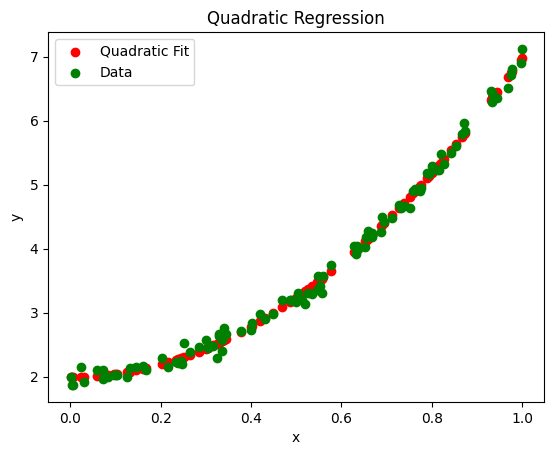

In [36]:
y_pred = linreg.predict(x_matrix)
plt.scatter(x, ytilde, label='Quadratic Fit', color = 'red')
plt.scatter(x, y, label='Data', color='green')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Regression')
plt.show()

In [37]:
print('The intercept alpha: \n', linreg.intercept_)
print('Coefficient beta : \n', linreg.coef_[:,1:])

The intercept alpha: 
 [1.99839265]
Coefficient beta : 
 [[-0.04952749  5.04322638]]


The results for the coefficients are equal to the ones above.

3. Using scikit-learn, compute also the mean square error and the R^2 factor. 

In [39]:
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))

Mean squared error: 0.01


In [31]:
print("Variance score: %.2f" % r2_score(y, y_pred))

Variance score: 1.00


Discuss the meaning of these results. Try also to vary the coefficient in front of the added stochastic noise term and discuss the quality of the fits.

The MSE is low, meaning that the model is pretty good in representing the relationship between vectors x an y. This is also confirmed by the $R^2$ value, which is high. This means that the model is likely to succeed in predicting well future samples.

In [11]:
#Variation of the coefficient in front of the stochastic noise term
x = np.random.rand(100,1)
y = 2.0+5*x*x+0.5*np.random.randn(100,1)
x_matrix = np.column_stack([x ** i for i in range(3)])

beta = np.dot(np.linalg.inv(np.dot(x_matrix.T,x_matrix)),np.dot(x_matrix.T,y))
ytilde = x_matrix @ beta

y_pred = linreg.predict(x_matrix)

print("Mean squared error: %.2f" % mean_squared_error(y, ytilde))
print("Variance score: %.2f" % r2_score(y, ytilde))

Mean squared error: 0.25
Variance score: 0.91


If I increase the coefficient in front of the stochastic noise term, the MSE increases and the $R^2$ value decreases. On the contrary, if I choose a smaller coefficient in front of the stochastic noise term, the MSE decreases and the $R^2$ value increases.

So, increasing the error makes the model worse, while decreasing the error makes the model more precise.